In [110]:
import pandas as pd
import os
import numpy as np

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
os.chdir(r'C:\Users\sulta\OneDrive\Documents\Quarter 2\ECON 441B Applied Data Management for Economists\Lab 3')
df = pd.read_csv("AAPL_quarterly_financials.csv")

In [4]:
df.head()


,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.index = df.name

In [6]:
df = pd.DataFrame(df.loc["BasicEPS", :]).iloc[2:,:]

In [7]:
df.index = pd.to_datetime(df.index)

In [8]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
df = df.sort_index().fillna(0.)

In [9]:
df.head()

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0


In [50]:
y = df.tail(81)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [10]:
from pytrends.request import TrendReq

In [96]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Ipad", "Iphone Release", "Iphone Color", "Huwai", "buy Iphone", "Sell Iphone", "UCLA", "The Weekend"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [97]:
df = df.resample("Q").mean()

In [93]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()



NameError: name 'X' is not defined

# 3.) Normalize all the X data

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()

In [100]:
X_scaled_array = scaler.fit_transform(df)

In [101]:
X_scaled = pd.DataFrame(X_scaled_array, columns=df.columns)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [42]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [102]:
from sklearn.linear_model import Lasso

In [103]:
lasso = Lasso(alpha = .5)

In [104]:
X_scaled

,Ipad,Iphone Release,Iphone Color,Huwai,buy Iphone,Sell Iphone,UCLA,The Weekend
0,-1.141887,-0.834918,-1.503970,-1.105368,-1.797446,-1.467829,2.013390,-1.271928
1,-1.141887,-0.834918,-1.503970,-1.230613,-1.797446,-1.488205,1.838386,-1.271928
2,-1.141887,-0.834918,-1.518787,-1.089712,-1.797446,-1.488205,1.410597,-1.226840
3,-1.141887,-0.834918,-1.503970,-1.089712,-1.797446,-1.528957,1.838386,-1.339560
4,-1.141887,-0.834918,-1.518787,-1.199302,-1.797446,-1.528957,1.721716,-1.001400
...,...,...,...,...,...,...,...,...
76,-0.144167,-0.339949,1.000025,-0.212994,-0.241833,-0.000755,-0.747789,0.418874
77,-0.256586,-0.183643,0.733327,-0.275617,-0.426050,-0.000755,-1.428362,0.576682
78,-0.144167,0.832345,1.414888,-0.150372,0.085665,0.447518,-1.389472,0.599226
79,-0.102010,-0.339949,1.607503,-0.244306,0.188008,0.366014,-0.728345,0.125801


In [105]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.5)

In [106]:
coefficients = lasso.coef_

TypeError: only size-1 arrays can be converted to Python scalars

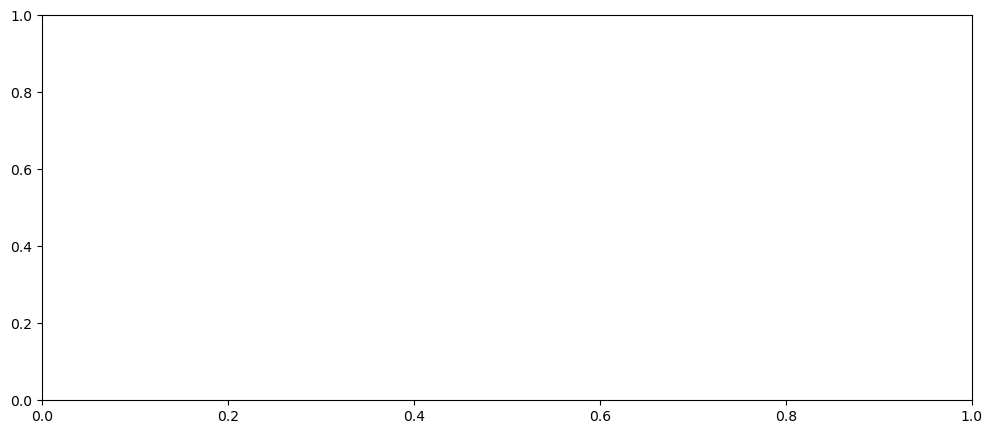

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X_scaled.columns, rotation='vertical')
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Based on the given magnitudes and the graph, The chosen variables seem uncorrelated with the Apple's EPS, which may show an issue in the code due to uneven amount of data. However, I would imagine that most given variables may have a an influence on Apple's EPS.